In [100]:
# Resume Classifier Implementation - Steps 0 & 1
# File: resume_classifier.ipynb

import os
import json
import numpy as np
import pandas as pd
import random
from pathlib import Path
import matplotlib.pyplot as plt
from datetime import datetime

# Step 0 - Project Setup
print("=== Step 0: Project Setup ===")

# Set random seeds for reproducibility
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

# Create project structure
project_folders = ['data', 'models', 'data/domain_requirements', "src"]
for folder in project_folders:
    Path(folder).mkdir(parents=True, exist_ok=True)
    print(f"Created folder: {folder}")

print("Project structure created successfully!")

=== Step 0: Project Setup ===
Created folder: data
Created folder: models
Created folder: data/domain_requirements
Created folder: src
Project structure created successfully!


=== Step 1: Balanced Dataset Generation ===

Generated 2000 resumes → data/balanced_synthetic_resumes.json

Dataset Statistics:
Total: 2000 | Avg Test Score: 62.3

Label Distribution:
label
Partial Fit    859
Fit            673
Not Fit        468
Name: count, dtype: int64



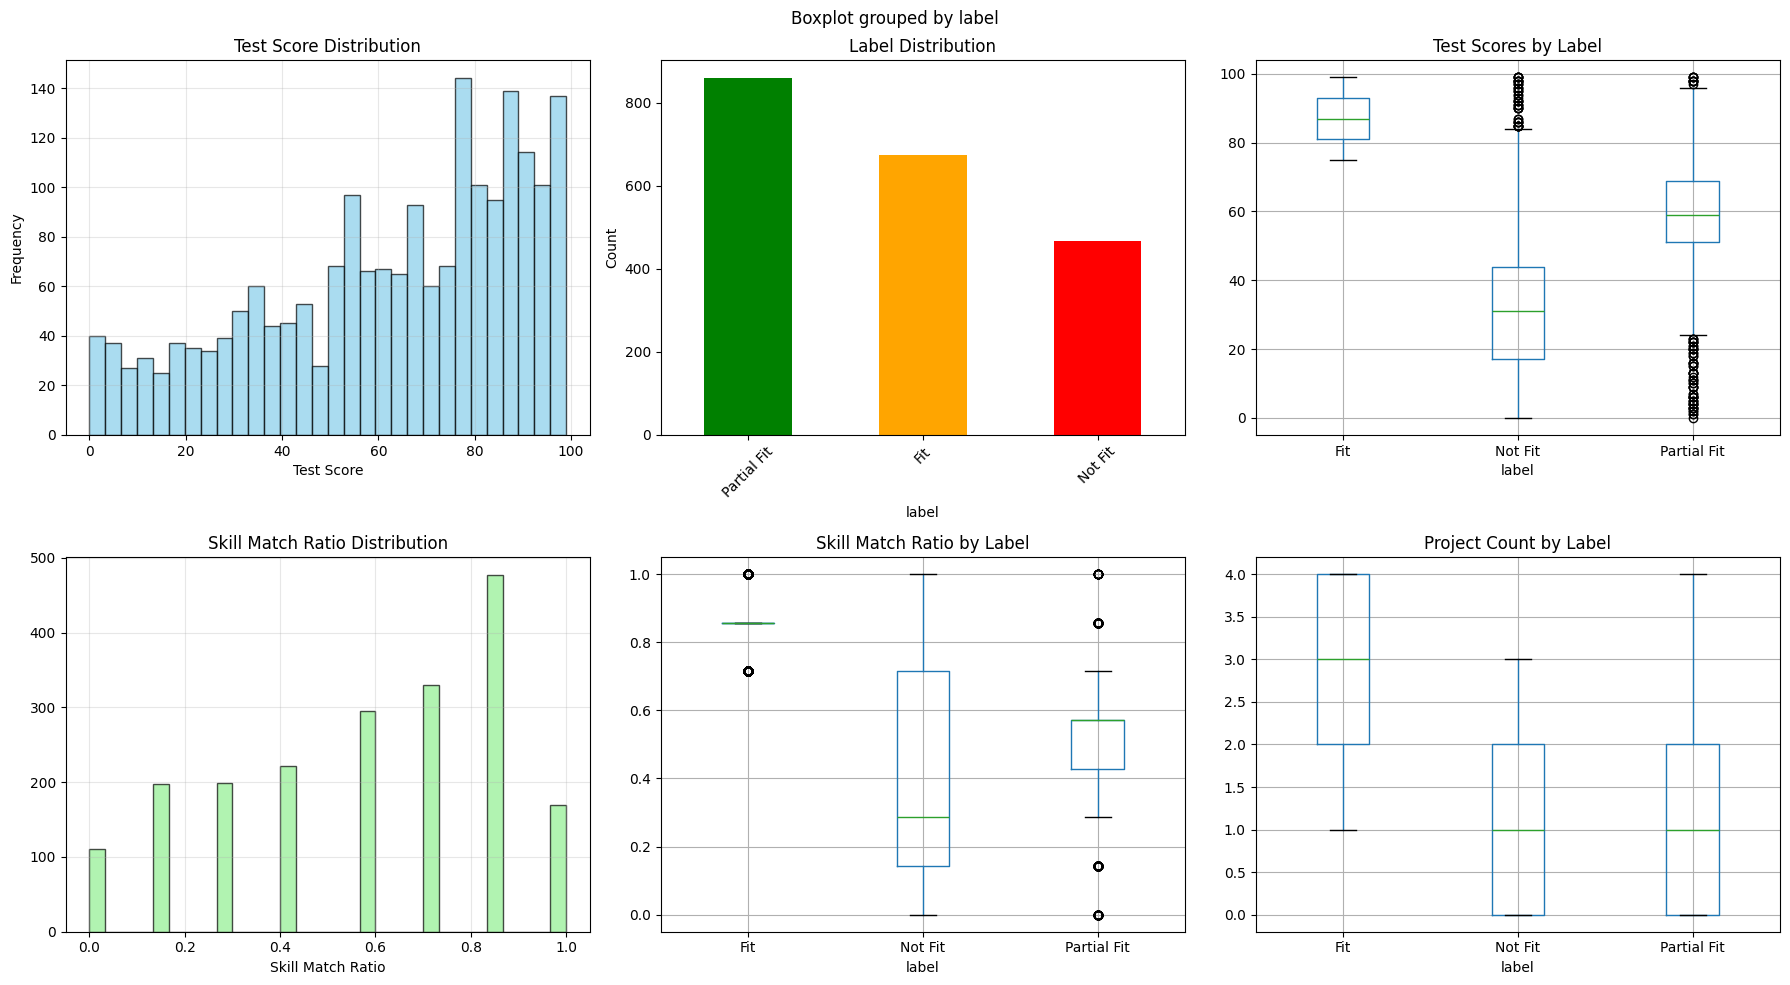

Visualization saved → data/balanced_dataset_statistics.png


In [60]:
import json
import random
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print("=== Step 1: Balanced Dataset Generation ===\n")

# Domain Requirements
domain_requirements = {
    "data_science": {
        "domain": "Data Science",
        "required_skills": ["Python", "Pandas", "NumPy", "Scikit-learn", "PyTorch", "Docker", "Deep Learning"]
    },
    "web_development": {
        "domain": "Web Development", 
        "required_skills": ["JavaScript", "React", "Node.js", "HTML", "CSS", "MongoDB", "Express"]
    },
    "mobile_development": {
        "domain": "Mobile Development",
        "required_skills": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "iOS", "Android"]
    },
    "devops": {
        "domain": "DevOps",
        "required_skills": ["Docker", "Kubernetes", "AWS", "Jenkins", "Terraform", "Linux", "CI/CD"]
    },
    "cybersecurity": {
        "domain": "Cybersecurity",
        "required_skills": ["Network Security", "Penetration Testing", "CISSP", "Firewall", "Encryption", "Python", "Risk Assessment"]
    }
}

# Save domain requirements
os.makedirs('data/domain_requirements', exist_ok=True)
for domain_key, requirements in domain_requirements.items():
    with open(f"data/domain_requirements/{domain_key}.json", 'w') as f:
        json.dump(requirements, f, indent=2)

# Skill pools
all_skills = {
    "data_science": ["Python", "R", "SQL", "Pandas", "NumPy", "Scikit-learn", "TensorFlow", "PyTorch", 
                    "Matplotlib", "Seaborn", "Jupyter", "Docker", "Deep Learning", "Machine Learning", 
                    "Statistics", "Data Visualization", "Big Data", "Spark", "Hadoop"],
    "web_dev": ["JavaScript", "React", "Vue.js", "Angular", "Node.js", "Express", "HTML", "CSS", 
               "MongoDB", "PostgreSQL", "MySQL", "Redis", "GraphQL", "REST API", "TypeScript", 
               "Webpack", "Git", "Bootstrap", "Sass"],
    "mobile": ["Java", "Kotlin", "Swift", "React Native", "Flutter", "Dart", "iOS", "Android", 
              "Xcode", "Android Studio", "Firebase", "SQLite", "Core Data", "UIKit", "SwiftUI"],
    "devops": ["Docker", "Kubernetes", "AWS", "Azure", "GCP", "Jenkins", "Terraform", "Ansible", 
              "Linux", "Bash", "Python", "CI/CD", "Git", "Monitoring", "Nagios", "Prometheus"],
    "security": ["Network Security", "Penetration Testing", "CISSP", "CEH", "Firewall", "Encryption", 
                "Python", "Wireshark", "Metasploit", "Nmap", "Risk Assessment", "Compliance", "SIEM"]
}

# Project templates
project_templates = {
    "data_science": ["Customer Churn Prediction", "Sales Forecasting Model", "Recommendation System", 
                    "Fraud Detection Algorithm", "Image Classification", "Natural Language Processing"],
    "web_dev": ["E-commerce Website", "Social Media Platform", "Portfolio Website", "Blog Platform", 
               "Task Management App", "Real-time Chat Application"],
    "mobile": ["Weather App", "Fitness Tracker", "Food Delivery App", "Social Media App", 
              "Game Application", "Banking App"],
    "devops": ["CI/CD Pipeline Setup", "Infrastructure as Code", "Container Orchestration", 
              "Monitoring Dashboard", "Automated Deployment", "Cloud Migration"],
    "security": ["Vulnerability Assessment", "Security Audit", "Network Monitoring System", 
                "Incident Response Plan", "Security Training Program", "Compliance Framework"]
}

# Job titles
job_titles = {
    "data_science": ["Data Scientist", "ML Engineer", "Data Analyst", "Research Scientist"],
    "web_dev": ["Frontend Developer", "Backend Developer", "Full Stack Developer", "Web Developer"],
    "mobile": ["iOS Developer", "Android Developer", "Mobile Developer", "App Developer"],
    "devops": ["DevOps Engineer", "Site Reliability Engineer", "Cloud Engineer", "Infrastructure Engineer"],
    "security": ["Security Analyst", "Cybersecurity Engineer", "Security Consultant", "SOC Analyst"]
}

skill_key_mapping = {
    "data_science": "data_science",
    "web_development": "web_dev", 
    "mobile_development": "mobile",
    "devops": "devops",
    "cybersecurity": "security"
}

def generate_resume_for_category(category, candidate_id, domains):
    """Generate a resume targeting a specific fit category"""
    
    preferred_domain_key = random.choice(domains)
    preferred_domain = domain_requirements[preferred_domain_key]["domain"]
    required_skills = domain_requirements[preferred_domain_key]["required_skills"]
    
    domain_skills = all_skills[skill_key_mapping[preferred_domain_key]]
    other_skills = list(set(sum(all_skills.values(), [])) - set(domain_skills))
    
    # Generate skills based on category
    if category == 'fit':
        required_count = max(1, int(len(required_skills) * random.uniform(0.7, 1.0)))
        selected_required = random.sample(required_skills, required_count)
        additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(2, 5))
        selected_skills = selected_required + additional_domain
        test_score = int(random.uniform(75, 100))
        n_projects = random.randint(1, 4)
        
    elif category == 'partial_fit':
        if random.choice([True, False]):
            required_count = max(1, int(len(required_skills) * random.uniform(0.4, 0.69)))
            selected_required = random.sample(required_skills, required_count)
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 3))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(30, 100))
        else:
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(50, 74))
        n_projects = random.randint(0, 3)
        
    else:  # not_fit
        if random.choice([True, False]):
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 0.39)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            
            if random.choice([True, False]):
                selected_skills = selected_required + random.sample(other_skills, random.randint(2, 6))
            else:
                additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(0, 2))
                selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(0, 100))
        else:
            required_count = max(0, int(len(required_skills) * random.uniform(0.0, 1.0)))
            selected_required = random.sample(required_skills, required_count) if required_count > 0 else []
            additional_domain = random.sample([s for s in domain_skills if s not in selected_required], random.randint(1, 4))
            selected_skills = selected_required + additional_domain
            test_score = int(random.uniform(0, 49))
        n_projects = random.randint(0, 2)
    
    # Add random other skills
    if len(selected_skills) < 8:
        selected_skills.extend(random.sample(other_skills, random.randint(0, 3)))
    
    # Generate projects
    domain_projects = project_templates[skill_key_mapping[preferred_domain_key]]
    selected_projects = random.sample(domain_projects, min(n_projects, len(domain_projects)))
    
    # Generate work experience
    n_jobs = random.randint(1, 4)
    domain_job_titles = job_titles[skill_key_mapping[preferred_domain_key]]
    work_experience = [{"title": random.choice(domain_job_titles), "years": random.randint(1, 8)} for _ in range(n_jobs)]
    
    return {
        "skills": list(set(selected_skills)),
        "projects": selected_projects,
        "work_experience": work_experience,
        "test_score": test_score,
        "preferred_domain": preferred_domain,
        "id": f"candidate_{candidate_id:04d}"
    }

def generate_balanced_resumes(n_samples=2000, target_distribution=None):
    """Generate synthetic resume data with balanced labels"""
    
    if target_distribution is None:
        target_distribution = {'fit': 0.33, 'partial_fit': 0.34, 'not_fit': 0.33}
    
    n_fit = int(n_samples * target_distribution['fit'])
    n_partial = int(n_samples * target_distribution['partial_fit'])
    n_not_fit = n_samples - n_fit - n_partial
    
    domains = list(domain_requirements.keys())
    resumes = []
    candidate_id = 1
    
    for _ in range(n_fit):
        resumes.append(generate_resume_for_category('fit', candidate_id, domains))
        candidate_id += 1
    
    for _ in range(n_partial):
        resumes.append(generate_resume_for_category('partial_fit', candidate_id, domains))
        candidate_id += 1
    
    for _ in range(n_not_fit):
        resumes.append(generate_resume_for_category('not_fit', candidate_id, domains))
        candidate_id += 1
    
    random.shuffle(resumes)
    return resumes

def calculate_labels(resumes):
    """Calculate labels for resumes based on rules"""
    labeled_resumes = []
    
    for resume in resumes:
        preferred_domain_key = next((k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), None)
        if not preferred_domain_key:
            continue
            
        required_skills = set(domain_requirements[preferred_domain_key]["required_skills"])
        candidate_skills = set(resume["skills"])
        
        skill_match_ratio = len(required_skills.intersection(candidate_skills)) / len(required_skills)
        test_score_norm = resume["test_score"] / 100.0
        project_count = len(resume["projects"])
        
        # Apply labeling rules
        if skill_match_ratio >= 0.70 and test_score_norm >= 0.75 and project_count >= 1:
            label = "Fit"
        elif (0.40 <= skill_match_ratio < 0.70) or (0.50 <= test_score_norm < 0.75):
            label = "Partial Fit"
        else:
            label = "Not Fit"
        
        resume_with_label = resume.copy()
        resume_with_label.update({
            "skill_match_ratio": skill_match_ratio,
            "test_score_norm": test_score_norm,
            "project_count": project_count,
            "label": label
        })
        labeled_resumes.append(resume_with_label)
    
    return labeled_resumes

# Generate and label dataset
synthetic_resumes = generate_balanced_resumes(2000)
labeled_resumes = calculate_labels(synthetic_resumes)

# Save dataset
os.makedirs('data', exist_ok=True)
with open('data/balanced_synthetic_resumes.json', 'w') as f:
    json.dump(labeled_resumes, f, indent=2)

print(f"Generated {len(labeled_resumes)} resumes → data/balanced_synthetic_resumes.json\n")

# Statistics
df = pd.DataFrame(labeled_resumes)
label_counts = df['label'].value_counts()

print("Dataset Statistics:")
print(f"Total: {len(df)} | Avg Test Score: {df['test_score'].mean():.1f}")
print(f"\nLabel Distribution:\n{label_counts}\n")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

axes[0, 0].hist(df['test_score'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].set_xlabel('Test Score')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Test Score Distribution')
axes[0, 0].grid(True, alpha=0.3)

label_counts.plot(kind='bar', ax=axes[0, 1], color=['green', 'orange', 'red'])
axes[0, 1].set_title('Label Distribution')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

df.boxplot(column='test_score', by='label', ax=axes[0, 2])
axes[0, 2].set_title('Test Scores by Label')

axes[1, 0].hist(df['skill_match_ratio'], bins=30, alpha=0.7, color='lightgreen', edgecolor='black')
axes[1, 0].set_xlabel('Skill Match Ratio')
axes[1, 0].set_title('Skill Match Ratio Distribution')
axes[1, 0].grid(True, alpha=0.3)

df.boxplot(column='skill_match_ratio', by='label', ax=axes[1, 1])
axes[1, 1].set_title('Skill Match Ratio by Label')

df.boxplot(column='project_count', by='label', ax=axes[1, 2])
axes[1, 2].set_title('Project Count by Label')

plt.tight_layout()
plt.savefig('data/balanced_dataset_statistics.png', dpi=150, bbox_inches='tight')
plt.show()

print("Visualization saved → data/balanced_dataset_statistics.png")


=== Step 2: Ground Truth Labels ===
Labeled 2000 resumes → data/labeled_resumes.json

Label Distribution:
  Fit: 673 (33.7%)
  Partial Fit: 859 (43.0%)
  Not Fit: 468 (23.4%)

=== Analysis by Domain ===
label               Fit  Not Fit  Partial Fit
preferred_domain                             
Cybersecurity       128       98          164
Data Science        136      102          167
DevOps              123       92          170
Mobile Development  154       89          171
Web Development     132       87          187


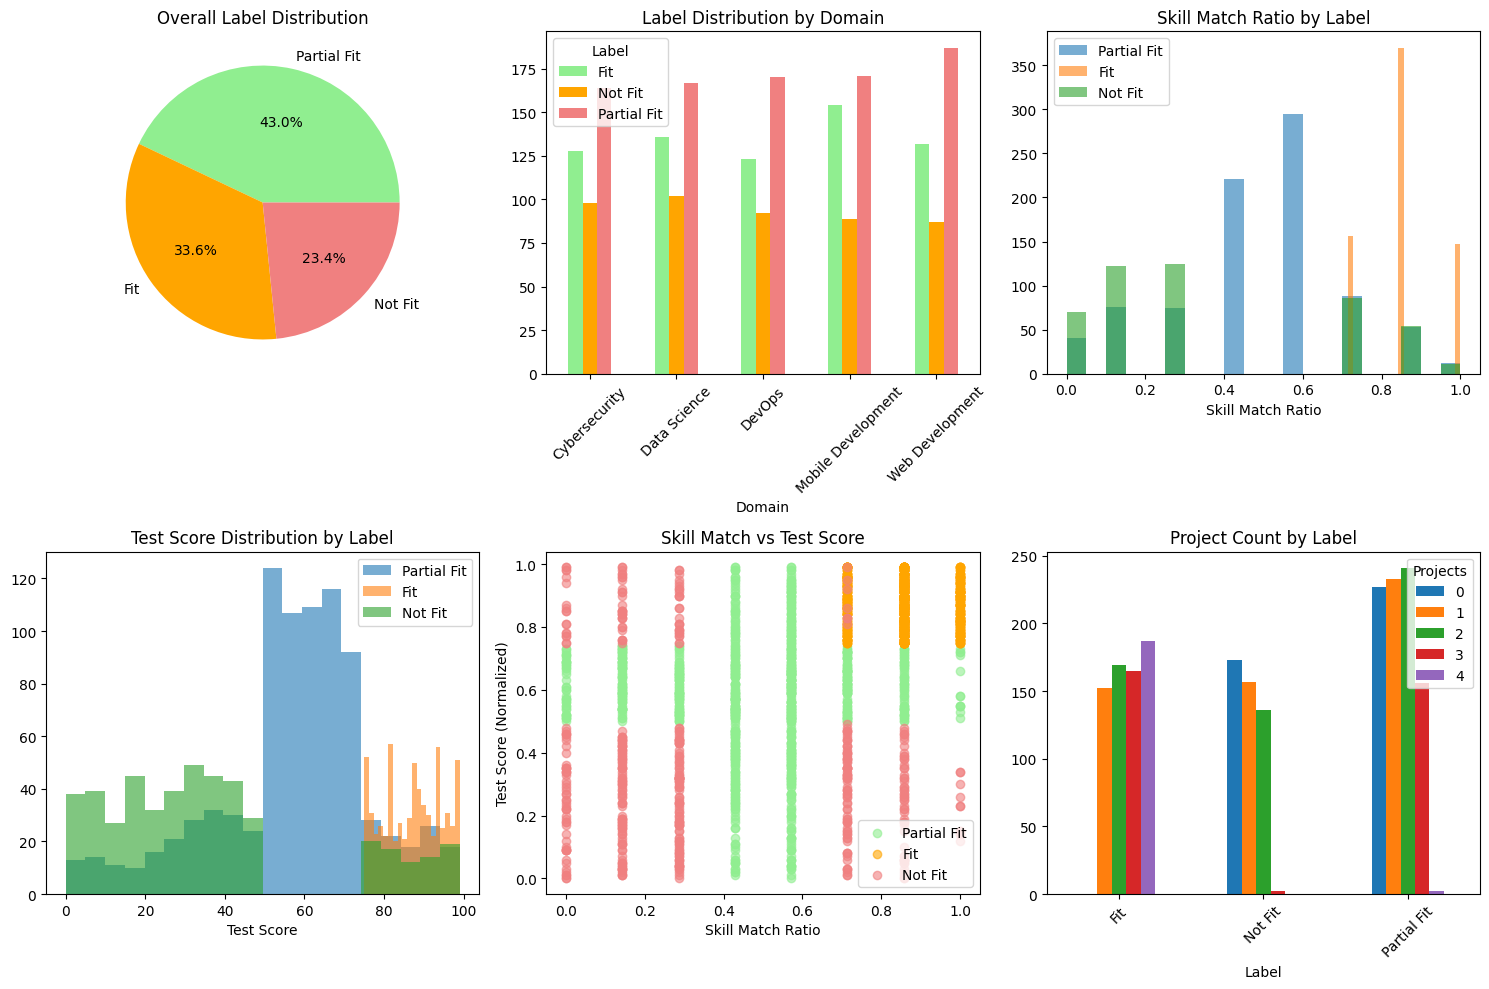

Analysis saved → data/labeling_analysis.png


In [61]:
# ============================================================================
# Step 2: Ground Truth Labels (Already applied in Step 1)
# ============================================================================
print("\n=== Step 2: Ground Truth Labels ===")

# Save labeled dataset (already calculated in Step 1)
with open('data/labeled_resumes.json', 'w') as f:
    json.dump(labeled_resumes, f, indent=2)

print(f"Labeled {len(labeled_resumes)} resumes → data/labeled_resumes.json")
print(f"\nLabel Distribution:")
for label in ['Fit', 'Partial Fit', 'Not Fit']:
    count = label_counts.get(label, 0)
    print(f"  {label}: {count} ({count/len(df):.1%})")

# Detailed analysis
print("\n=== Analysis by Domain ===")
domain_label_crosstab = pd.crosstab(df['preferred_domain'], df['label'])
print(domain_label_crosstab)

# Visualize label analysis
fig2, axes2 = plt.subplots(2, 3, figsize=(15, 10))

# Pie chart
colors = ['lightgreen', 'orange', 'lightcoral']
axes2[0, 0].pie(label_counts.values, labels=label_counts.index, autopct='%1.1f%%', colors=colors)
axes2[0, 0].set_title('Overall Label Distribution')

# Bar chart by domain
domain_label_crosstab.plot(kind='bar', ax=axes2[0, 1], color=colors)
axes2[0, 1].set_title('Label Distribution by Domain')
axes2[0, 1].set_xlabel('Domain')
axes2[0, 1].tick_params(axis='x', rotation=45)
axes2[0, 1].legend(title='Label')

# Skill match ratio by label
for label in df['label'].unique():
    data = df[df['label'] == label]['skill_match_ratio']
    axes2[0, 2].hist(data, alpha=0.6, label=label, bins=20)
axes2[0, 2].set_xlabel('Skill Match Ratio')
axes2[0, 2].set_title('Skill Match Ratio by Label')
axes2[0, 2].legend()

# Test score by label
for label in df['label'].unique():
    data = df[df['label'] == label]['test_score']
    axes2[1, 0].hist(data, alpha=0.6, label=label, bins=20)
axes2[1, 0].set_xlabel('Test Score')
axes2[1, 0].set_title('Test Score Distribution by Label')
axes2[1, 0].legend()

# Scatter plot
for i, label in enumerate(df['label'].unique()):
    data = df[df['label'] == label]
    axes2[1, 1].scatter(data['skill_match_ratio'], data['test_score_norm'], 
                        alpha=0.6, label=label, color=colors[i])
axes2[1, 1].set_xlabel('Skill Match Ratio')
axes2[1, 1].set_ylabel('Test Score (Normalized)')
axes2[1, 1].set_title('Skill Match vs Test Score')
axes2[1, 1].legend()

# Project count by label
project_counts_by_label = df.groupby(['label', 'project_count']).size().unstack(fill_value=0)
project_counts_by_label.plot(kind='bar', ax=axes2[1, 2])
axes2[1, 2].set_title('Project Count by Label')
axes2[1, 2].set_xlabel('Label')
axes2[1, 2].tick_params(axis='x', rotation=45)
axes2[1, 2].legend(title='Projects')

plt.tight_layout()
plt.savefig('data/labeling_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("Analysis saved → data/labeling_analysis.png")

In [62]:
# ============================================================================
# Step 3: Preprocessing & Feature Engineering
# ============================================================================
print("\n=== Step 3: Feature Engineering ===")

from sklearn.preprocessing import StandardScaler

def build_skill_vocabulary(resumes, domain_requirements):
    """Build comprehensive skill vocabulary"""
    all_skills = set()
    for resume in resumes:
        all_skills.update(resume.get('skills', []))
    for domain_data in domain_requirements.values():
        all_skills.update(domain_data.get('required_skills', []))
    
    cleaned_skills = {skill.strip().lower() for skill in all_skills if skill.strip() and len(skill.strip()) > 1}
    return sorted(list(cleaned_skills))

def encode_skills(candidate_skills, skill_vocab):
    """Convert skills to binary vector"""
    skill_vector = np.zeros(len(skill_vocab), dtype=int)
    normalized_skills = {skill.strip().lower() for skill in candidate_skills}
    for i, vocab_skill in enumerate(skill_vocab):
        if vocab_skill in normalized_skills:
            skill_vector[i] = 1
    return skill_vector

def compute_skill_matches(candidate_skills, required_skills):
    """Compute matched and missing skills"""
    candidate_set = {skill.strip().lower() for skill in candidate_skills}
    required_set = {skill.strip().lower() for skill in required_skills}
    
    matched_skills = list(candidate_set.intersection(required_set))
    missing_skills = list(required_set - candidate_set)
    skill_match_ratio = len(matched_skills) / len(required_set) if required_set else 0.0
    
    return matched_skills, missing_skills, skill_match_ratio

def suggest_alternative_domains(candidate_skills, current_domain, domain_requirements, top_n=3):
    """Suggest alternative domains based on skill match"""
    suggestions = []
    
    for domain_key, domain_info in domain_requirements.items():
        domain_name = domain_info["domain"]
        if domain_name == current_domain:
            continue
        
        required_skills = domain_info["required_skills"]
        matched, missing, ratio = compute_skill_matches(candidate_skills, required_skills)
        
        suggestions.append({
            'domain': domain_name,
            'domain_key': domain_key,
            'skill_match_ratio': ratio,
            'matched_skills': matched,
            'missing_skills': missing,
            'matched_count': len(matched),
            'required_count': len(required_skills)
        })
    
    suggestions.sort(key=lambda x: x['skill_match_ratio'], reverse=True)
    return suggestions[:top_n]

def extract_project_features(projects):
    """Extract features from projects"""
    project_count = len(projects) if projects else 0
    project_text = " ".join(projects) if projects else ""
    return project_count, project_text

def extract_experience_features(work_experience):
    """Extract features from work experience"""
    if not work_experience:
        return 0.0, 0, ""
    
    years_experience = sum(item.get('years', 0) for item in work_experience)
    max_years = max(item.get('years', 0) for item in work_experience)
    job_titles = [item.get('title', '') for item in work_experience]
    experience_text = " ".join(job_titles)
    
    return float(years_experience), max_years, experience_text

class ResumeFeatureScaler:
    """Scaler for numeric resume features"""
    def __init__(self):
        self.project_scaler = StandardScaler()
        self.experience_scaler = StandardScaler()
        self.is_fitted = False
    
    def fit(self, numeric_features):
        if len(numeric_features) == 0:
            return self
        
        numeric_array = np.array(numeric_features)
        if numeric_array.shape[1] >= 3:
            self.experience_scaler.fit(numeric_array[:, :2])
            self.project_scaler.fit(numeric_array[:, 2:3])
        
        self.is_fitted = True
        return self
    
    def transform(self, numeric_features):
        if not self.is_fitted:
            raise ValueError("Scaler must be fitted before transform")
        
        numeric_array = np.array(numeric_features)
        if numeric_array.ndim == 1:
            numeric_array = numeric_array.reshape(1, -1)
        
        if numeric_array.shape[1] >= 3:
            scaled_experience = self.experience_scaler.transform(numeric_array[:, :2])
            scaled_projects = self.project_scaler.transform(numeric_array[:, 2:3])
            return np.concatenate([scaled_experience, scaled_projects], axis=1)
        
        return np.array([])
    
    def fit_transform(self, numeric_features):
        return self.fit(numeric_features).transform(numeric_features)

def extract_all_features(resume, skill_vocab, domain_requirements):
    """Extract all features from a single resume"""
    domain_key = next((k for k, v in domain_requirements.items() if v["domain"] == resume["preferred_domain"]), None)
    if domain_key is None:
        raise ValueError(f"No requirements found for domain {resume['preferred_domain']}")
    
    required_skills = domain_requirements[domain_key]["required_skills"]
    candidate_skills = resume.get('skills', [])
    projects = resume.get('projects', [])
    work_experience = resume.get('work_experience', [])
    test_score = resume.get('test_score', 0)
    
    skill_vector = encode_skills(candidate_skills, skill_vocab)
    matched_skills, missing_skills, skill_match_ratio = compute_skill_matches(candidate_skills, required_skills)
    project_count, project_text = extract_project_features(projects)
    years_experience, max_years, experience_text = extract_experience_features(work_experience)
    test_score_norm = max(0, min(100, float(test_score))) / 100.0
    numeric_features = [years_experience, max_years, project_count]
    alternative_domains = suggest_alternative_domains(candidate_skills, resume['preferred_domain'], domain_requirements, top_n=3)
    
    return {
        'skill_vector': skill_vector,
        'skill_match_ratio': skill_match_ratio,
        'matched_skills': matched_skills,
        'missing_skills': missing_skills,
        'project_count': project_count,
        'project_text': project_text,
        'years_experience': years_experience,
        'max_years': max_years,
        'experience_text': experience_text,
        'test_score': test_score,
        'test_score_norm': test_score_norm,
        'numeric_features': numeric_features,
        'domain': resume['preferred_domain'],
        'id': resume['id'],
        'alternative_domains': alternative_domains
    }

# Build vocabulary and extract features
skill_vocab = build_skill_vocabulary(labeled_resumes, domain_requirements)
print(f"Skill vocabulary: {len(skill_vocab)} unique skills")

all_features = []
for resume in labeled_resumes:
    try:
        features = extract_all_features(resume, skill_vocab, domain_requirements)
        features['label'] = resume['label']
        all_features.append(features)
    except Exception as e:
        continue

print(f"Extracted features from {len(all_features)} resumes")

# Scale numeric features
numeric_feature_matrix = [f['numeric_features'] for f in all_features]
scaler = ResumeFeatureScaler()
scaler.fit(numeric_feature_matrix)

for features in all_features:
    scaled_numeric = scaler.transform([features['numeric_features']])
    features['scaled_numeric_features'] = scaled_numeric[0]

# Save artifacts
with open('data/skill_vocab.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)

sample_features = all_features[:5]
for features in sample_features:
    features['skill_vector'] = features['skill_vector'].tolist()
    features['scaled_numeric_features'] = features['scaled_numeric_features'].tolist()

with open('data/sample_features.json', 'w') as f:
    json.dump(sample_features, f, indent=2)

print(f"\nFeature Summary (sample):")
print(f"  Skill match ratio: {all_features[0]['skill_match_ratio']:.3f}")
print(f"  Projects: {all_features[0]['project_count']} | Experience: {all_features[0]['years_experience']:.0f} yrs")
print(f"  Top alternative: {all_features[0]['alternative_domains'][0]['domain']} "
      f"({all_features[0]['alternative_domains'][0]['skill_match_ratio']:.3f} match)")

print("Saved → data/skill_vocab.json, data/sample_features.json")


=== Step 3: Feature Engineering ===
Skill vocabulary: 77 unique skills
Extracted features from 2000 resumes

Feature Summary (sample):
  Skill match ratio: 0.571
  Projects: 1 | Experience: 21 yrs
  Top alternative: DevOps (0.286 match)
Saved → data/skill_vocab.json, data/sample_features.json


In [63]:
# ============================================================================
# Step 4: Final Feature Vector Construction
# ============================================================================
print("\n=== Step 4: Feature Vector Construction ===")

from sklearn.feature_extraction.text import TfidfVectorizer
import pickle

class FeatureVectorBuilder:
    """Builds final feature vectors using parallel branches"""
    
    def __init__(self, skill_vocab_size, use_text_embeddings=False):
        self.skill_vocab_size = skill_vocab_size
        self.use_text_embeddings = use_text_embeddings
        self.project_vectorizer = TfidfVectorizer(max_features=64, stop_words='english', ngram_range=(1, 2), min_df=2)
        self.experience_vectorizer = TfidfVectorizer(max_features=64, stop_words='english', ngram_range=(1, 2), min_df=2)
        self.is_fitted = False
    
    def fit_text_vectorizers(self, all_features):
        project_texts = [f.get('project_text', '') or 'no projects' for f in all_features]
        experience_texts = [f.get('experience_text', '') or 'no experience' for f in all_features]
        
        self.project_vectorizer.fit(project_texts)
        self.experience_vectorizer.fit(experience_texts)
        self.is_fitted = True
    
    def build_skill_branch(self, features):
        """Branch 1: Skills (binary vector + match ratio)"""
        return np.concatenate([features['skill_vector'], [features['skill_match_ratio']]])
    
    def build_numeric_branch(self, features):
        """Branch 2: Numeric features"""
        scaled = features['scaled_numeric_features']
        return np.array([
            features['test_score_norm'],
            scaled[2],  # project_count_scaled
            scaled[0],  # years_experience_scaled
            features['skill_match_ratio']
        ])
    
    def build_text_branch(self, features):
        """Branch 3: Text embeddings (optional)"""
        if not self.use_text_embeddings or not self.is_fitted:
            return np.array([])
        
        project_text = features.get('project_text', '') or 'no projects'
        experience_text = features.get('experience_text', '') or 'no experience'
        
        project_vector = self.project_vectorizer.transform([project_text]).toarray().flatten()
        experience_vector = self.experience_vectorizer.transform([experience_text]).toarray().flatten()
        
        return np.concatenate([project_vector, experience_vector])
    
    def build_final_vector(self, features):
        """Concatenate all branches"""
        branches = [self.build_skill_branch(features), self.build_numeric_branch(features)]
        
        if self.use_text_embeddings and self.is_fitted:
            text_branch = self.build_text_branch(features)
            if len(text_branch) > 0:
                branches.append(text_branch)
        
        return np.concatenate(branches)
    
    def get_feature_dimensions(self):
        skill_dim = self.skill_vocab_size + 1
        numeric_dim = 4
        text_dim = 128 if self.use_text_embeddings else 0
        return {
            'skill_branch_dim': skill_dim,
            'numeric_branch_dim': numeric_dim,
            'text_branch_dim': text_dim,
            'final_vector_dim': skill_dim + numeric_dim + text_dim
        }

# Build feature vectors
use_text_features = True
vector_builder = FeatureVectorBuilder(skill_vocab_size=len(skill_vocab), use_text_embeddings=use_text_features)

if use_text_features:
    vector_builder.fit_text_vectorizers(all_features)

feature_vectors = []
labels = []

for features in all_features:
    try:
        feature_vectors.append(vector_builder.build_final_vector(features))
        labels.append(features['label'])
    except Exception as e:
        continue

X = np.array(feature_vectors)
y = np.array(labels)

dimensions = vector_builder.get_feature_dimensions()
print(f"Feature vectors built: {X.shape}")
print(f"  Skill: {dimensions['skill_branch_dim']} | Numeric: {dimensions['numeric_branch_dim']} | Text: {dimensions['text_branch_dim']}")
print(f"  Sparsity: {np.mean(X == 0):.2%}")

unique_labels, label_counts = np.unique(y, return_counts=True)
print(f"\nLabel distribution: {dict(zip(unique_labels, label_counts))}")

# Save artifacts
np.save('data/X_features.npy', X)
np.save('data/y_labels.npy', y)

with open('data/feature_vector_builder.pkl', 'wb') as f:
    pickle.dump(vector_builder, f)

label_to_idx = {label: idx for idx, label in enumerate(unique_labels)}
with open('data/label_mapping.json', 'w') as f:
    json.dump({
        'label_to_idx': label_to_idx,
        'idx_to_label': {idx: label for idx, label in enumerate(unique_labels)},
        'unique_labels': unique_labels.tolist()
    }, f, indent=2)

with open('data/feature_dimensions.json', 'w') as f:
    json.dump(dimensions, f, indent=2)

print("Saved → X_features.npy, y_labels.npy, feature_vector_builder.pkl, label_mapping.json")


=== Step 4: Feature Vector Construction ===
Feature vectors built: (2000, 210)
  Skill: 78 | Numeric: 4 | Text: 128
  Sparsity: 89.16%

Label distribution: {np.str_('Fit'): np.int64(673), np.str_('Not Fit'): np.int64(468), np.str_('Partial Fit'): np.int64(859)}
Saved → X_features.npy, y_labels.npy, feature_vector_builder.pkl, label_mapping.json


In [80]:
# ============================================================================
# Step 5: Model Architecture (Keras/TensorFlow) - CORRECTED
# ============================================================================
print("\n=== Step 5: Model Architecture ===")

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Model, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import seaborn as sns

tf.random.set_seed(42)

class ResumeClassifierModel:
    """Hybrid neural network for resume classification with parallel branches"""
    
    def __init__(self, skill_vocab_size, numeric_dim, text_dim=0, num_classes=3):
        self.skill_vocab_size = skill_vocab_size
        self.numeric_dim = numeric_dim
        self.text_dim = text_dim
        self.num_classes = num_classes
        self.use_text_branch = text_dim > 0
        self.model = None
        self.label_encoder = LabelEncoder()
        self.is_compiled = False
        
    def build_model(self):
        """Build hybrid model architecture with parallel branches"""
        skill_input = Input(shape=(self.skill_vocab_size + 1,), name='skill_input')
        numeric_input = Input(shape=(self.numeric_dim,), name='numeric_input')
        inputs = [skill_input, numeric_input]
        
        x1 = layers.Dense(256, activation='relu')(skill_input)
        x1 = layers.Dropout(0.3)(x1)
        x1 = layers.Dense(128, activation='relu')(x1)
        
        x2 = layers.Dense(32, activation='relu')(numeric_input)
        x2 = layers.Dense(16, activation='relu')(x2)
        
        branches_to_concat = [x1, x2]
        
        if self.use_text_branch:
            text_input = Input(shape=(self.text_dim,), name='text_input')
            inputs.append(text_input)
            x3 = layers.Dense(128, activation='relu')(text_input)
            x3 = layers.Dense(64, activation='relu')(x3)
            branches_to_concat.append(x3)
        
        concat = layers.concatenate(branches_to_concat)
        h = layers.Dense(128, activation='relu')(concat)
        h = layers.Dropout(0.3)(h)
        h = layers.Dense(64, activation='relu')(h)
        output = layers.Dense(self.num_classes, activation='softmax')(h)
        
        self.model = Model(inputs=inputs, outputs=output)
        return self.model
    
    def compile_model(self, learning_rate=1e-3):
        if self.model is None:
            self.build_model()
        self.model.compile(
            loss='categorical_crossentropy',
            optimizer=Adam(learning_rate=learning_rate),
            metrics=['accuracy']
        )
        self.is_compiled = True
        
    def prepare_inputs(self, X):
        skill_dim = self.skill_vocab_size + 1
        numeric_dim = self.numeric_dim
        
        skill_features = X[:, :skill_dim]
        numeric_features = X[:, skill_dim:skill_dim + numeric_dim]
        inputs = [skill_features, numeric_features]
        
        if self.use_text_branch:
            text_features = X[:, skill_dim + numeric_dim:]
            inputs.append(text_features)
        
        return inputs

# CRITICAL: Load saved artifacts to match feature dimensions
with open('data/skill_vocab.json', 'r') as f:
    skill_vocab = json.load(f)

with open('data/feature_dimensions.json', 'r') as f:
    dimensions = json.load(f)

with open('data/label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Verify dimensions match saved features
X = np.load('data/X_features.npy')
print(f"Loaded features shape: {X.shape}")
print(f"Skill vocab size: {len(skill_vocab)}")
print(f"Expected skill branch: {len(skill_vocab) + 1} (vocab + match_ratio)")
print(f"Feature dimensions: {dimensions}")

model_classifier = ResumeClassifierModel(
    skill_vocab_size=len(skill_vocab),
    numeric_dim=dimensions['numeric_branch_dim'],
    text_dim=dimensions['text_branch_dim'],
    num_classes=len(label_mapping['unique_labels'])
)

model_classifier.build_model()
model_classifier.compile_model()
model = model_classifier.model

print(f"\nModel expects:")
for i, inp in enumerate(model.inputs):
    print(f"  Input {i}: {inp.shape}")

model.summary()


=== Step 5: Model Architecture ===
Loaded features shape: (2000, 210)
Skill vocab size: 77
Expected skill branch: 78 (vocab + match_ratio)
Feature dimensions: {'skill_branch_dim': 78, 'numeric_branch_dim': 4, 'text_branch_dim': 128, 'final_vector_dim': 210}

Model expects:
  Input 0: (None, 78)
  Input 1: (None, 4)
  Input 2: (None, 128)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ skill_input (InputLayer)      │ (None, 78)                │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_45 (Dense)              │ (None, 256)               │          20,224 │ skill_input[0][0]          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ numeric_input (InputLayer)    │ (None, 4)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ text_input (InputLayer)       │ (None, 128)               │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_10 (Dropout)          │ (None, 256)               │               0 │ dense_45[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_47 (Dense)              │ (None, 32)                │             160 │ numeric_input[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_49 (Dense)              │ (None, 128)               │          16,512 │ text_input[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_46 (Dense)              │ (None, 128)               │          32,896 │ dropout_10[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_48 (Dense)              │ (None, 16)                │             528 │ dense_47[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_50 (Dense)              │ (None, 64)                │           8,256 │ dense_49[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_5 (Concatenate)   │ (None, 208)               │               0 │ dense_46[0][0],            │
│                               │                           │                 │ dense_48[0][0],            │
│                               │                           │                 │ dense_50[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_51 (Dense)              │ (None, 128)               │          26,752 │ concatenate_5[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_11 (Dropout)          │ (None, 128)               │               0 │ dense_51[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_52 (Dense)              │ (None, 64)                │           8,256 │ dropout_11[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_53 (Dense)              │ (None, 3)                 │             195 │ dense_52[0][0]             │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 113,779 (444.45 KB)

 Trainable params: 113,779 (444.45 KB)

 Non-trainable params: 0 (0.00 B)

In [74]:
# Add this debug check before running Step 6
print(f"\nDimension check:")
print(f"  X.shape[1]: {X.shape[1]}")
print(f"  Expected: {len(skill_vocab) + 1 + dimensions['numeric_branch_dim'] + dimensions['text_branch_dim']}")


Dimension check:
  X.shape[1]: 210
  Expected: 210



=== Step 6: Training Procedure ===
Split: Train=1400 | Val=300 | Test=300
Training: 50 epochs, batch_size=32
Epoch 1/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.3571 - loss: 1.0624
Epoch 1: val_loss improved from None to 0.83445, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.4314 - loss: 0.9957 - val_accuracy: 0.5667 - val_loss: 0.8345
Epoch 2/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5964 - loss: 0.7783
Epoch 2: val_loss improved from 0.83445 to 0.64889, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.6264 - loss: 0.7257 - val_accuracy: 0.6933 - val_loss: 0.6489
Epoch 3/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6864 - loss: 0.6157
Epoch 3: val_loss improved from 0.64889 to 0.55558, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7100 - loss: 0.5855 - val_accuracy: 0.7567 - val_loss: 0.5556
Epoch 4/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7708 - loss: 0.5046
Epoch 4: val_loss did not improve from 0.55558
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7800 - loss: 0.4850 - val_accuracy: 0.7367 - val_loss: 0.5771
Epoch 5/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7864 - loss: 0.4599
Epoch 5: val_loss improved from 0.55558 to 0.54053, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.8057 - loss: 0.4266 - val_accuracy: 0.7467 - val_loss: 0.5405
Epoch 6/50
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8191 - loss: 0.3991
Epoch 6: val_loss improved from 0.54053 to 0.44446, saving model to models/best_resume_classifier.h5


44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.8364 - loss: 0.3634 - val_accuracy: 0.8033 - val_loss: 0.4445
Epoch 7/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8756 - loss: 0.2996
Epoch 7: val_loss did not improve from 0.44446
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8793 - loss: 0.2847 - val_accuracy: 0.7767 - val_loss: 0.5348
Epoch 8/50
39/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8856 - loss: 0.2667
Epoch 8: val_loss did not improve from 0.44446
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8907 - loss: 0.2498 - val_accuracy: 0.7967 - val_loss: 0.4858
Epoch 9/50
35/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9083 - loss: 0.2085
Epoch 9: val_loss did not improve from 0.44446
44/44 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9200 - loss: 0.1960 - val_accuracy: 0.7833 - val_loss: 0.6023
Epoch 10/50
38/44 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9319 - loss: 0.1825
Epoch 10: val_loss did not improve from 0.44446
44/44 ━━━━

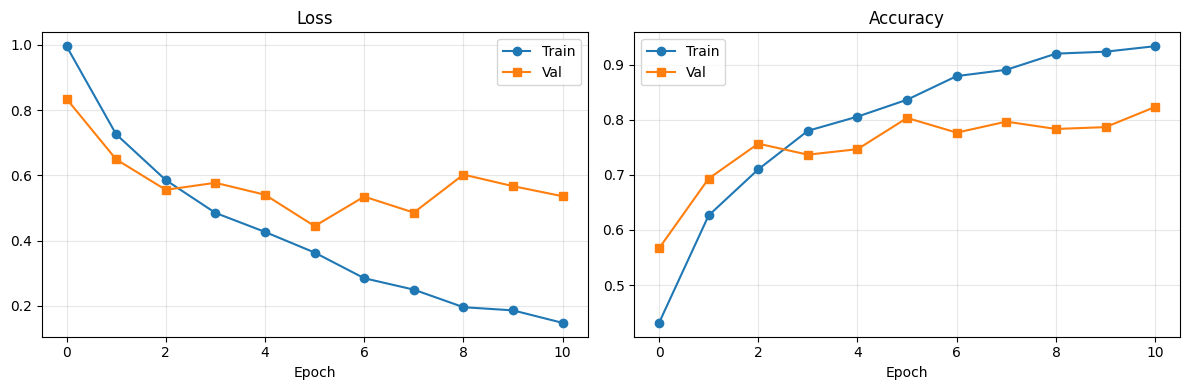

Training complete → models/best_resume_classifier.h5


In [75]:
# ============================================================================
# Step 6: Training Procedure
# ============================================================================
print("\n=== Step 6: Training Procedure ===")

# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_categorical = tf.keras.utils.to_categorical(y_encoded, num_classes=len(label_mapping['unique_labels']))

# Train/val/test split: 70/15/15 stratified
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y_categorical, 
    test_size=0.3,
    random_state=42,
    stratify=y_encoded
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5,
    random_state=42,
    stratify=y_temp.argmax(axis=1)
)

print(f"Split: Train={X_train.shape[0]} | Val={X_val.shape[0]} | Test={X_test.shape[0]}")

# Prepare inputs for each split
train_inputs = model_classifier.prepare_inputs(X_train)
val_inputs = model_classifier.prepare_inputs(X_val)
test_inputs = model_classifier.prepare_inputs(X_test)

# Compute class weights
class_weights_array = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_encoded),
    y=y_train.argmax(axis=1)
)
class_weight_dict = {i: weight for i, weight in enumerate(class_weights_array)}

# Setup callbacks
os.makedirs('models', exist_ok=True)
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='models/best_resume_classifier.h5', monitor='val_loss', 
                   save_best_only=True, verbose=1)
]

# Training hyperparameters
BATCH_SIZE = 32
EPOCHS = 50

print(f"Training: {EPOCHS} epochs, batch_size={BATCH_SIZE}")

# Train the model
history = model.fit(
    train_inputs,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(val_inputs, y_val),
    class_weight=class_weight_dict,
    callbacks=callbacks,
    verbose=1
)

# Save training history
with open('data/training_history.json', 'w') as f:
    history_dict = {key: [float(v) for v in values] for key, values in history.history.items()}
    json.dump(history_dict, f, indent=2)

# Plot training history
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].plot(history.history['loss'], label='Train', marker='o')
axes[0].plot(history.history['val_loss'], label='Val', marker='s')
axes[0].set_title('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].plot(history.history['accuracy'], label='Train', marker='o')
axes[1].plot(history.history['val_accuracy'], label='Val', marker='s')
axes[1].set_title('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/training_history.png', dpi=150, bbox_inches='tight')
plt.show()

print("Training complete → models/best_resume_classifier.h5")


=== Step 7: Model Evaluation ===
Test Loss: 0.5412 | Test Accuracy: 0.7667

              precision    recall  f1-score   support

         Fit       0.86      0.97      0.91       101
     Not Fit       0.63      0.67      0.65        70
 Partial Fit       0.77      0.66      0.71       129

    accuracy                           0.77       300
   macro avg       0.75      0.77      0.76       300
weighted avg       0.76      0.77      0.76       300



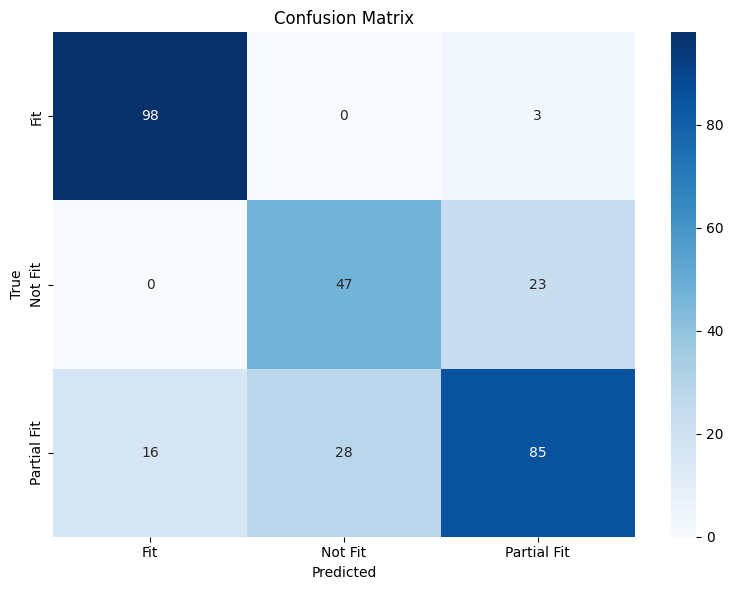

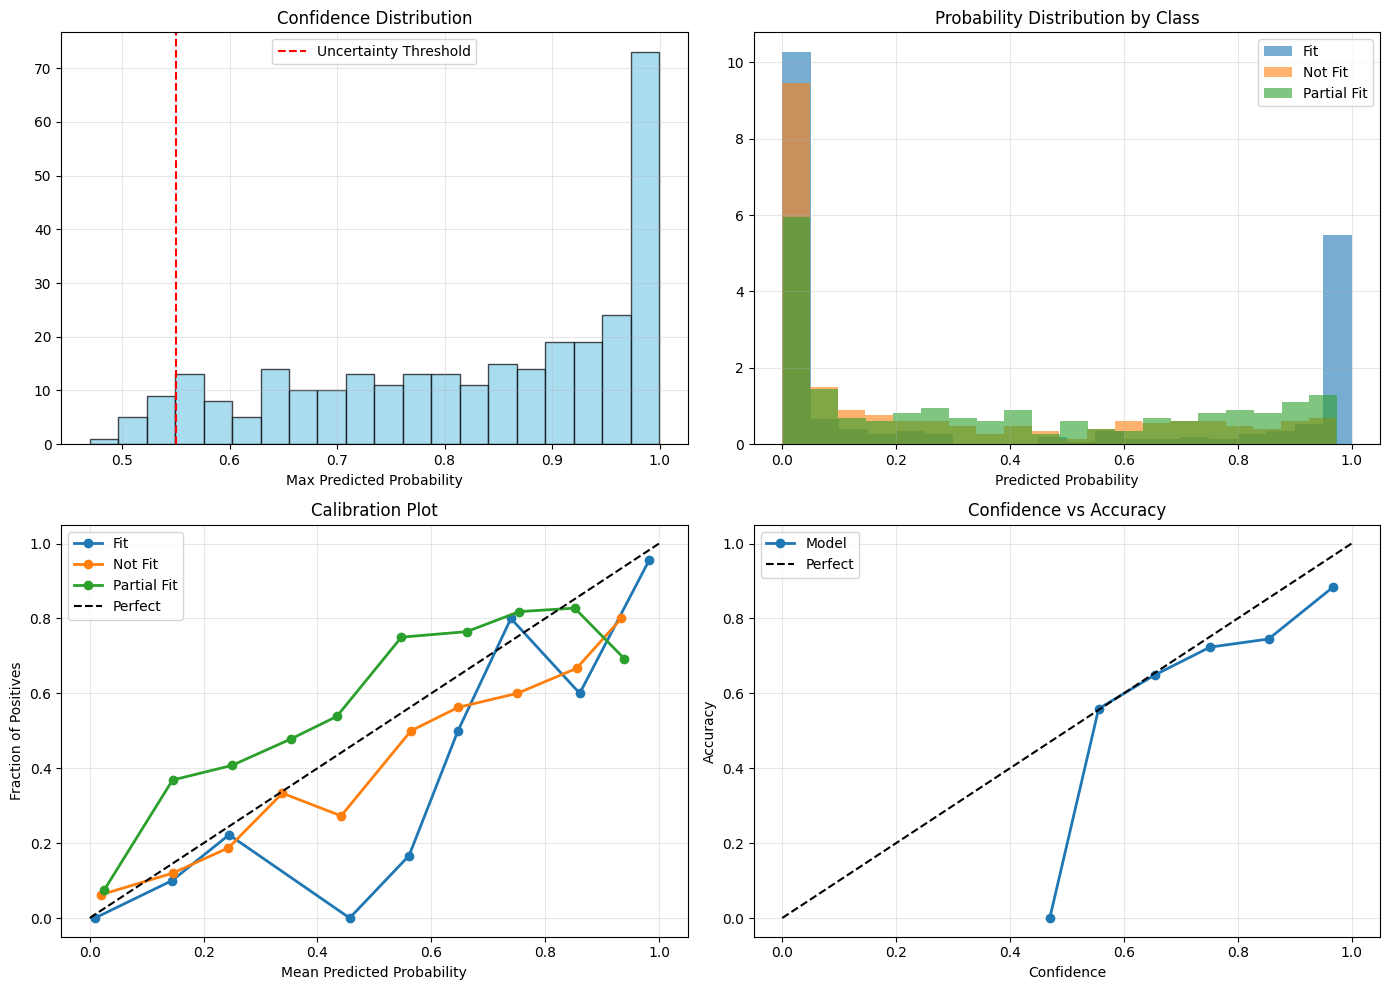


Uncertainty Analysis (threshold=0.55):
  Uncertain: 15 (5.0%)
  Confident: 285 (95.0%)

Saved → models/resume_classifier_model.h5, evaluation_metrics.json


In [76]:
# ============================================================================
# Step 7: Enhanced Metrics & Evaluation
# ============================================================================
print("\n=== Step 7: Model Evaluation ===")

from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix, f1_score
from sklearn.calibration import calibration_curve
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test_inputs, y_test, verbose=0)
y_pred_probs = model.predict(test_inputs, verbose=0)
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test, axis=1)

print(f"Test Loss: {test_loss:.4f} | Test Accuracy: {test_accuracy:.4f}")

# Classification metrics
target_names = label_encoder.classes_
print(f"\n{classification_report(y_true, y_pred, target_names=target_names)}")

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.tight_layout()
plt.savefig('data/confusion_matrix.png', dpi=150, bbox_inches='tight')
plt.show()

# F1 scores
f1_macro = f1_score(y_true, y_pred, average='macro')
f1_weighted = f1_score(y_true, y_pred, average='weighted')

# Calibration analysis
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Max probability distribution
axes[0, 0].hist(y_pred_probs.max(axis=1), bins=20, alpha=0.7, color='skyblue', edgecolor='black')
axes[0, 0].axvline(x=0.55, color='red', linestyle='--', label='Uncertainty Threshold')
axes[0, 0].set_xlabel('Max Predicted Probability')
axes[0, 0].set_title('Confidence Distribution')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Per-class probabilities
for i, class_name in enumerate(target_names):
    axes[0, 1].hist(y_pred_probs[:, i], bins=20, alpha=0.6, label=class_name, density=True)
axes[0, 1].set_xlabel('Predicted Probability')
axes[0, 1].set_title('Probability Distribution by Class')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Calibration curves
for i, class_name in enumerate(target_names):
    y_binary = (y_true == i).astype(int)
    fraction_of_positives, mean_predicted_value = calibration_curve(
        y_binary, y_pred_probs[:, i], n_bins=10, strategy='uniform'
    )
    axes[1, 0].plot(mean_predicted_value, fraction_of_positives, 'o-', label=class_name, linewidth=2)

axes[1, 0].plot([0, 1], [0, 1], 'k--', label='Perfect')
axes[1, 0].set_xlabel('Mean Predicted Probability')
axes[1, 0].set_ylabel('Fraction of Positives')
axes[1, 0].set_title('Calibration Plot')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Confidence vs Accuracy
max_probs = y_pred_probs.max(axis=1)
correct = (y_pred == y_true).astype(int)
confidence_bins = np.linspace(0, 1, 11)
bin_accuracies, bin_confidences = [], []

for i in range(len(confidence_bins) - 1):
    bin_mask = (max_probs >= confidence_bins[i]) & (max_probs < confidence_bins[i+1])
    if bin_mask.sum() > 0:
        bin_accuracies.append(correct[bin_mask].mean())
        bin_confidences.append(max_probs[bin_mask].mean())

axes[1, 1].plot(bin_confidences, bin_accuracies, 'o-', linewidth=2, label='Model')
axes[1, 1].plot([0, 1], [0, 1], 'k--', label='Perfect')
axes[1, 1].set_xlabel('Confidence')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].set_title('Confidence vs Accuracy')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('data/calibration_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

# Threshold analysis
uncertainty_threshold = 0.55
uncertain_mask = max_probs < uncertainty_threshold
uncertain_count = uncertain_mask.sum()
print(f"\nUncertainty Analysis (threshold={uncertainty_threshold}):")
print(f"  Uncertain: {uncertain_count} ({uncertain_count/len(y_pred_probs)*100:.1f}%)")
print(f"  Confident: {len(y_pred_probs) - uncertain_count} ({(1-uncertain_count/len(y_pred_probs))*100:.1f}%)")

# Save artifacts
model.save('models/resume_classifier_model.h5')
with open('models/label_encoder.pkl', 'wb') as f:
    pickle.dump(label_encoder, f)

evaluation_metrics = {
    'test_loss': float(test_loss),
    'test_accuracy': float(test_accuracy),
    'f1_macro': float(f1_macro),
    'f1_weighted': float(f1_weighted),
    'confusion_matrix': cm.tolist(),
    'classification_report': classification_report(y_true, y_pred, target_names=target_names, output_dict=True)
}

with open('data/evaluation_metrics.json', 'w') as f:
    json.dump(evaluation_metrics, f, indent=2)

print("\nSaved → models/resume_classifier_model.h5, evaluation_metrics.json")

In [77]:
# ============================================================================
# Step 10: Final JSON Output Generation with Model Loading
# ============================================================================
print("\n=== Step 10: Final JSON Output Generation ===")

import joblib
from datetime import datetime
from pathlib import Path
import keras

class ResumeClassificationPipeline:
    """Complete pipeline for resume classification with JSON output"""
    
    def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
                 domain_requirements, scaler):
        self.model = model
        self.feature_builder = feature_builder
        self.label_encoder = label_encoder
        self.skill_vocab = skill_vocab
        self.domain_requirements = domain_requirements
        self.scaler = scaler
        
    def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
        """Complete pipeline: raw resume JSON → final classification JSON"""
        try:
            # Extract and scale features
            resume_features = extract_all_features(resume_json, self.skill_vocab, self.domain_requirements)
            scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
            resume_features['scaled_numeric_features'] = scaled_numeric[0]
            
            # Build feature vector and predict
            final_vector = self.feature_builder.build_final_vector(resume_features)
            model_inputs = model_classifier.prepare_inputs(final_vector.reshape(1, -1))
            class_probs = self.model.predict(model_inputs, verbose=0)[0]
            
            # Get prediction and confidence
            pred_idx = np.argmax(class_probs)
            label = self.label_encoder.classes_[pred_idx]
            confidence = round(float(class_probs[pred_idx]), precision)
            
            # Build feature summary
            feature_summary = {
                "skill_match_ratio": round(resume_features['skill_match_ratio'], precision),
                "years_experience": int(resume_features['years_experience']),
                "test_score_norm": round(resume_features['test_score_norm'], precision),
                "project_count": int(resume_features['project_count'])
            }
            
            if include_raw_scores:
                feature_summary["test_score_raw"] = int(resume_features['test_score'])
            
            # Get alternative domains for Partial Fit/Not Fit
            alternative_domains = None
            if label in ["Partial Fit", "Not Fit"]:
                alternative_domains = self._format_alternative_domains(
                    resume_features.get('alternative_domains', []), precision
                )
            
            # Generate explanation
            explanation = self._generate_explanation(
                resume_features['test_score'], resume_features['skill_match_ratio'],
                resume_features['matched_skills'], resume_features['missing_skills'],
                resume_features['project_count'], resume_features['years_experience'],
                label, confidence, alternative_domains
            )
            
            # Build final JSON
            result = {
                "label": label,
                "confidence": confidence,
                "matched_skills": resume_features['matched_skills'],
                "missing_skills": resume_features['missing_skills'],
                "feature_summary": feature_summary,
                "explanation": explanation,
                "metadata": {
                    "domain": resume_features['domain'],
                    "candidate_id": resume_features['id'],
                    "classification_timestamp": datetime.now().isoformat(),
                    "model_version": "1.0"
                }
            }
            
            if alternative_domains:
                result["alternative_domain_suggestions"] = alternative_domains
            
            return result
            
        except Exception as e:
            return {
                "error": f"Classification failed: {str(e)}",
                "candidate_id": resume_json.get('id', 'unknown'),
                "timestamp": datetime.now().isoformat()
            }
    
    def _format_alternative_domains(self, suggestions, precision=3):
        """Format alternative domain suggestions for JSON output"""
        if not suggestions:
            return None
        
        formatted = []
        for i, suggestion in enumerate(suggestions, 1):
            formatted.append({
                "rank": i,
                "domain": suggestion['domain'],
                "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
                "matched_skills_count": suggestion['matched_count'],
                "required_skills_count": suggestion['required_count'],
                "matched_skills": suggestion['matched_skills'][:5],
                "key_missing_skills": suggestion['missing_skills'][:3]
            })
        
        return formatted
    
    def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
                            missing_skills, project_count, years_experience, 
                            predicted_label, confidence, alternative_domains=None):
        """Generate human-readable explanation"""
        # Score description
        score_desc = ("Excellent" if test_score >= 85 else "High" if test_score >= 75 else
                     "Good" if test_score >= 60 else "Fair" if test_score >= 50 else "Low")
        
        # Skills description
        total_required = len(matched_skills) + len(missing_skills)
        skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        skills_desc = (f"covers most required skills {skills_fraction}" if skill_match_ratio >= 0.8 else
                      f"covers many required skills {skills_fraction}" if skill_match_ratio >= 0.6 else
                      f"covers some required skills {skills_fraction}" if skill_match_ratio >= 0.4 else
                      f"covers few required skills {skills_fraction}")
        
        missing_desc = f", but lacks {', '.join(missing_skills[:3])}" if missing_skills else ""
        
        # Experience description
        exp_desc = (f"{int(years_experience)} years of solid experience" if years_experience >= 3 else
                   f"{int(years_experience)} year{'s' if years_experience != 1 else ''} of experience" if years_experience >= 1 else
                   "limited professional experience")
        
        # Project description
        proj_desc = (f"strong portfolio ({project_count} projects)" if project_count >= 3 else
                    f"{project_count} project{'s' if project_count != 1 else ''}" if project_count >= 1 else
                    "no projects listed")
        
        # Recommendation
        recommendation = ""
        if predicted_label == "Partial Fit" and missing_skills:
            key_missing = missing_skills[:2]
            if key_missing:
                recommendation = f" Recommend gaining experience in {', '.join(key_missing)}."
        
        # Alternative domain suggestion
        domain_suggestion = ""
        if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
            top_domain = alternative_domains[0]
            match_pct = int(top_domain['skill_match_ratio'] * 100)
            domain_suggestion = (f" Consider applying for {top_domain['domain']} roles "
                               f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
                               f"/{top_domain['required_skills_count']} required skills).")
        
        return (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
                f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
                f"Model confidence: {confidence:.2f} → {predicted_label}."
                f"{recommendation}{domain_suggestion}")
    
    def batch_classify(self, resume_list, output_file=None):
        """Classify multiple resumes and optionally save to file"""
        results = [self.classify_resume(resume) for resume in resume_list]
        
        if output_file:
            with open(output_file, 'w') as f:
                json.dump(results, f, indent=2)
            print(f"Saved {len(results)} results → {output_file}")
        
        return results

def load_classification_pipeline():
    """Load complete classification pipeline from saved artifacts"""
    try:
        artifacts_path = Path('artifacts')
        
        # Try loading complete pipeline first
        pipeline_file = artifacts_path / 'classification_pipeline.pkl'
        if pipeline_file.exists():
            return joblib.load(pipeline_file), None
        
        # Fallback: Load individual components
        model = keras.models.load_model('models/resume_classifier_complete.h5')
        scaler = joblib.load(artifacts_path / 'feature_scaler.pkl')
        label_encoder = joblib.load(artifacts_path / 'label_encoder.pkl')
        feature_builder = joblib.load(artifacts_path / 'feature_vector_builder.pkl')
        
        with open(artifacts_path / 'skill_vocabulary.json', 'r') as f:
            skill_vocab = json.load(f)
        
        with open(artifacts_path / 'domain_requirements.json', 'r') as f:
            domain_requirements = json.load(f)
        
        pipeline = ResumeClassificationPipeline(
            model=model,
            feature_builder=feature_builder,
            label_encoder=label_encoder,
            skill_vocab=skill_vocab,
            domain_requirements=domain_requirements,
            scaler=scaler
        )
        
        return pipeline, None
        
    except Exception as e:
        return None, f"Failed to load pipeline: {str(e)}"

# Initialize pipeline
if 'model' in locals() and 'vector_builder' in locals():
    classification_pipeline = ResumeClassificationPipeline(
        model=model, feature_builder=vector_builder, label_encoder=label_encoder,
        skill_vocab=skill_vocab, domain_requirements=domain_requirements, scaler=scaler
    )
    print("Pipeline initialized from current session")
else:
    classification_pipeline, error = load_classification_pipeline()
    if classification_pipeline is None:
        raise RuntimeError(f"Cannot load pipeline: {error}")
    print("Pipeline loaded from saved artifacts")

# Test with sample resumes
sample_resumes = labeled_resumes[:5] if 'labeled_resumes' in locals() else []

if sample_resumes:
    print(f"\nGenerating JSON outputs for {len(sample_resumes)} resumes...")
    sample_results = []
    
    for i, resume in enumerate(sample_resumes):
        result = classification_pipeline.classify_resume(resume, include_raw_scores=True, precision=3)
        if 'error' not in result:
            print(f"{i+1}. {result['metadata']['candidate_id']}: {result['label']} "
                  f"(conf={result['confidence']}, skills={len(result['matched_skills'])}/{len(result['matched_skills'])+len(result['missing_skills'])})")
        sample_results.append(result)
    
    # Save results
    Path('data').mkdir(exist_ok=True)
    with open('data/sample_json_outputs.json', 'w') as f:
        json.dump(sample_results, f, indent=2)
    
    print(f"\nSaved → data/sample_json_outputs.json")
    print(f"\nExample output:\n{json.dumps(sample_results[0], indent=2)}")

print("\n✓ Step 10 Complete - Pipeline ready for production use")


=== Step 10: Final JSON Output Generation ===
Pipeline initialized from current session

Generating JSON outputs for 5 resumes...
1. candidate_1246: Not Fit (conf=0.779, skills=4/7)
2. candidate_0403: Fit (conf=0.99, skills=7/7)
3. candidate_1023: Partial Fit (conf=0.556, skills=5/7)
4. candidate_1490: Not Fit (conf=0.893, skills=5/7)
5. candidate_1849: Partial Fit (conf=0.755, skills=3/7)

Saved → data/sample_json_outputs.json

Example output:
{
  "label": "Not Fit",
  "confidence": 0.779,
  "matched_skills": [
    "docker",
    "deep learning",
    "pytorch",
    "pandas"
  ],
  "missing_skills": [
    "python",
    "numpy",
    "scikit-learn"
  ],
  "feature_summary": {
    "skill_match_ratio": 0.571,
    "years_experience": 21,
    "test_score_norm": 0.37,
    "project_count": 1,
    "test_score_raw": 37
  },
  "explanation": "Low test score (37/100) and covers some required skills (4/7 matched), but lacks python, numpy, scikit-learn. Has 1 project and 21 years of solid experience

In [78]:
# Step 8 - Save Model & Artifacts
print(f"\n=== Step 8: Save Model & Artifacts ===")

# Create models directory if it doesn't exist
Path('models').mkdir(exist_ok=True)
Path('artifacts').mkdir(exist_ok=True)

# Save model weights and architecture
print("Saving model architecture and weights...")
model.save('models/resume_classifier_complete.h5')
print("✓ Saved: models/resume_classifier_complete.h5")

# Save TensorFlow SavedModel format (for production deployment)
# For TensorFlow SavedModel format in Keras 3
model.export('models/resume_classifier_savedmodel')
print("✓ Saved: models/resume_classifier_savedmodel/ (TensorFlow SavedModel)")

# Save all preprocessing artifacts
print("Saving preprocessing artifacts...")

# Save scalers
joblib.dump(scaler, 'artifacts/feature_scaler.pkl')
print("✓ Saved: artifacts/feature_scaler.pkl")

# Save skill vocabulary
with open('artifacts/skill_vocabulary.json', 'w') as f:
    json.dump(skill_vocab, f, indent=2)
print("✓ Saved: artifacts/skill_vocabulary.json")

# Save label encoder
joblib.dump(label_encoder, 'artifacts/label_encoder.pkl')
print("✓ Saved: artifacts/label_encoder.pkl")

# Save feature vector builder
joblib.dump(vector_builder, 'artifacts/feature_vector_builder.pkl')
print("✓ Saved: artifacts/feature_vector_builder.pkl")

# Save domain requirements
with open('artifacts/domain_requirements.json', 'w') as f:
    json.dump(domain_requirements, f, indent=2)
print("✓ Saved: artifacts/domain_requirements.json")

# Save complete classification pipeline
joblib.dump(classification_pipeline, 'artifacts/classification_pipeline.pkl')
print("✓ Saved: artifacts/classification_pipeline.pkl")

# Save explanation templates and configuration
explanation_config = {
    "score_thresholds": {
        "excellent": 85,
        "high": 75, 
        "good": 60,
        "fair": 50
    },
    "skill_ratio_thresholds": {
        "most": 0.8,
        "many": 0.6,
        "some": 0.4
    },
    "experience_thresholds": {
        "solid": 3,
        "some": 1
    },
    "confidence_precision": 3,
    "explanation_template": "template_based_explanation"
}

with open('artifacts/explanation_config.json', 'w') as f:
    json.dump(explanation_config, f, indent=2)
print("✓ Saved: artifacts/explanation_config.json")

# Create model manifest/metadata
model_manifest = {
    "model_name": "resume_classifier",
    "version": "1.0",
    "created_date": datetime.now().isoformat(),
    "model_architecture": "hybrid_neural_network",
    "input_features": {
        "skill_vocabulary_size": len(skill_vocab),
        "numeric_features": 4,
        "text_features": 128 if use_text_features else 0,
        "total_features": dimensions['final_vector_dim']
    },
    "output_classes": label_encoder.classes_.tolist(),
    "training_samples": len(X_train),
    "validation_samples": len(X_val),
    "test_samples": len(X_test),
    "test_accuracy": float(test_accuracy),
    "artifacts": {
        "model_weights": "models/resume_classifier_complete.h5",
        "savedmodel": "models/resume_classifier_savedmodel/",
        "feature_scaler": "artifacts/feature_scaler.pkl",
        "skill_vocabulary": "artifacts/skill_vocabulary.json",
        "label_encoder": "artifacts/label_encoder.pkl",
        "feature_builder": "artifacts/feature_vector_builder.pkl",
        "domain_requirements": "artifacts/domain_requirements.json",
        "pipeline": "artifacts/classification_pipeline.pkl",
        "explanation_config": "artifacts/explanation_config.json"
    }
}

with open('artifacts/model_manifest.json', 'w') as f:
    json.dump(model_manifest, f, indent=2)
print("✓ Saved: artifacts/model_manifest.json")

# Test loading pipeline from artifacts
print(f"\n=== Testing Artifact Loading ===")
try:
    # Test loading the complete pipeline
    loaded_pipeline = joblib.load('artifacts/classification_pipeline.pkl')
    
    # Test classification with loaded pipeline
    test_resume = sample_resumes[0]
    loaded_result = loaded_pipeline.classify_resume(test_resume)
    
    if 'error' not in loaded_result:
        print("✓ Successfully loaded and tested complete pipeline")
        print(f"  Test prediction: {loaded_result['label']} ({loaded_result['confidence']})")
    else:
        print(f"✗ Pipeline test failed: {loaded_result['error']}")
        
except Exception as e:
    print(f"✗ Failed to load pipeline: {e}")


=== Step 8: Save Model & Artifacts ===
Saving model architecture and weights...
✓ Saved: models/resume_classifier_complete.h5
INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


INFO:tensorflow:Assets written to: models/resume_classifier_savedmodel\assets


Saved artifact at 'models/resume_classifier_savedmodel'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): List[TensorSpec(shape=(None, 78), dtype=tf.float32, name='skill_input'), TensorSpec(shape=(None, 4), dtype=tf.float32, name='numeric_input'), TensorSpec(shape=(None, 128), dtype=tf.float32, name='text_input')]
Output Type:
  TensorSpec(shape=(None, 3), dtype=tf.float32, name=None)
Captures:
  3059529602768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3059529605840: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736073232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736073040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736072464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736071120: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736071888: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736070928: TensorSpec(shape=(), dtype=tf.resource, name=None)
  3058736072848: Ten

In [89]:
unseen_resumes = [
    {
        "skills": ["CI/CD","PyTorch","Deep Learning","Docker","R","Node.js","Pandas"],
        "projects": ["Customer Churn Prediction"],
        "title": "Data Scientist",
        "years_experience": 8,
        "test_score": 37,
        "preferred_domain": "Data Science",
        "id": "candidate_1246"
    },
    {
        "skills": ["Python","Machine Learning","SQL","Tableau"],
        "projects": ["Sales Forecasting"],
        "title": "Data Analyst",
        "years_experience": 3,
        "test_score": 72,
        "preferred_domain": "Data Analytics",
        "id": "candidate_1247"
    }
    # Add more resumes as needed
]

In [99]:
# ============================================================================
# Step 10: Final JSON Output Generation with Model Loading
# ============================================================================
print("\n=== Step 10: Final JSON Output Generation ===")

import joblib
from datetime import datetime
from pathlib import Path
import keras

class ResumeClassificationPipeline:
    """Complete pipeline for resume classification with JSON output"""
    
    def __init__(self, model, feature_builder, label_encoder, skill_vocab, 
                 domain_requirements, scaler):
        self.model = model
        self.feature_builder = feature_builder
        self.label_encoder = label_encoder
        self.skill_vocab = skill_vocab
        self.domain_requirements = domain_requirements
        self.scaler = scaler
        
    def classify_resume(self, resume_json, include_raw_scores=True, precision=3):
        """Complete pipeline: raw resume JSON → final classification JSON"""
        try:
            # Extract and scale features
            resume_features = extract_all_features(resume_json, self.skill_vocab, self.domain_requirements)
            scaled_numeric = self.scaler.transform([resume_features['numeric_features']])
            resume_features['scaled_numeric_features'] = scaled_numeric[0]
            
            # Build feature vector and predict
            final_vector = self.feature_builder.build_final_vector(resume_features)
            model_inputs = model_classifier.prepare_inputs(final_vector.reshape(1, -1))
            class_probs = self.model.predict(model_inputs, verbose=0)[0]
            
            # Get prediction and confidence
            pred_idx = np.argmax(class_probs)
            label = self.label_encoder.classes_[pred_idx]
            confidence = round(float(class_probs[pred_idx]), precision)
            
            # Build feature summary
            feature_summary = {
                "skill_match_ratio": round(resume_features['skill_match_ratio'], precision),
                "years_experience": int(resume_features['years_experience']),
                "test_score_norm": round(resume_features['test_score_norm'], precision),
                "project_count": int(resume_features['project_count'])
            }
            
            if include_raw_scores:
                feature_summary["test_score_raw"] = int(resume_features['test_score'])
            
            # Get alternative domains for Partial Fit/Not Fit
            alternative_domains = None
            if label in ["Partial Fit", "Not Fit"]:
                alternative_domains = self._format_alternative_domains(
                    resume_features.get('alternative_domains', []), precision
                )
            
            # Generate explanation
            explanation = self._generate_explanation(
                resume_features['test_score'], resume_features['skill_match_ratio'],
                resume_features['matched_skills'], resume_features['missing_skills'],
                resume_features['project_count'], resume_features['years_experience'],
                label, confidence, alternative_domains
            )
            
            # Build final JSON
            result = {
                "label": label,
                "confidence": confidence,
                "matched_skills": resume_features['matched_skills'],
                "missing_skills": resume_features['missing_skills'],
                "feature_summary": feature_summary,
                "explanation": explanation,
                "metadata": {
                    "domain": resume_features['domain'],
                    "candidate_id": resume_features['id'],
                    "classification_timestamp": datetime.now().isoformat(),
                    "model_version": "1.0"
                }
            }
            
            if alternative_domains:
                result["alternative_domain_suggestions"] = alternative_domains
            
            return result
            
        except Exception as e:
            return {
                "error": f"Classification failed: {str(e)}",
                "candidate_id": resume_json.get('id', 'unknown'),
                "timestamp": datetime.now().isoformat()
            }
    
    def _format_alternative_domains(self, suggestions, precision=3):
        """Format alternative domain suggestions for JSON output"""
        if not suggestions:
            return None
        
        formatted = []
        for i, suggestion in enumerate(suggestions, 1):
            formatted.append({
                "rank": i,
                "domain": suggestion['domain'],
                "skill_match_ratio": round(suggestion['skill_match_ratio'], precision),
                "matched_skills_count": suggestion['matched_count'],
                "required_skills_count": suggestion['required_count'],
                "matched_skills": suggestion['matched_skills'][:5],
                "key_missing_skills": suggestion['missing_skills'][:3]
            })
        
        return formatted
    
    def _generate_explanation(self, test_score, skill_match_ratio, matched_skills, 
                            missing_skills, project_count, years_experience, 
                            predicted_label, confidence, alternative_domains=None):
        """Generate human-readable explanation"""
        # Score description
        score_desc = ("Excellent" if test_score >= 85 else "High" if test_score >= 75 else
                     "Good" if test_score >= 60 else "Fair" if test_score >= 50 else "Low")
        
        # Skills description
        total_required = len(matched_skills) + len(missing_skills)
        skills_fraction = f"({len(matched_skills)}/{total_required} matched)"
        skills_desc = (f"covers most required skills {skills_fraction}" if skill_match_ratio >= 0.8 else
                      f"covers many required skills {skills_fraction}" if skill_match_ratio >= 0.6 else
                      f"covers some required skills {skills_fraction}" if skill_match_ratio >= 0.4 else
                      f"covers few required skills {skills_fraction}")
        
        missing_desc = f", but lacks {', '.join(missing_skills[:3])}" if missing_skills else ""
        
        # Experience description
        exp_desc = (f"{int(years_experience)} years of solid experience" if years_experience >= 3 else
                   f"{int(years_experience)} year{'s' if years_experience != 1 else ''} of experience" if years_experience >= 1 else
                   "limited professional experience")
        
        # Project description
        proj_desc = (f"strong portfolio ({project_count} projects)" if project_count >= 3 else
                    f"{project_count} project{'s' if project_count != 1 else ''}" if project_count >= 1 else
                    "no projects listed")
        
        # Recommendation
        recommendation = ""
        if predicted_label == "Partial Fit" and missing_skills:
            key_missing = missing_skills[:2]
            if key_missing:
                recommendation = f" Recommend gaining experience in {', '.join(key_missing)}."
        
        # Alternative domain suggestion
        domain_suggestion = ""
        if predicted_label in ["Partial Fit", "Not Fit"] and alternative_domains:
            top_domain = alternative_domains[0]
            match_pct = int(top_domain['skill_match_ratio'] * 100)
            domain_suggestion = (f" Consider applying for {top_domain['domain']} roles "
                               f"({match_pct}% skill match with {top_domain['matched_skills_count']}"
                               f"/{top_domain['required_skills_count']} required skills).")
        
        return (f"{score_desc} test score ({int(test_score)}/100) and {skills_desc}"
                f"{missing_desc}. Has {proj_desc} and {exp_desc}. "
                f"Model confidence: {confidence:.2f} → {predicted_label}."
                f"{recommendation}{domain_suggestion}")
    
    def batch_classify(self, resume_list, output_file=None):
        """Classify multiple resumes and optionally save to file"""
        results = [self.classify_resume(resume) for resume in resume_list]
        
        if output_file:
            with open(output_file, 'w') as f:
                json.dump(results, f, indent=2)
            print(f"Saved {len(results)} results → {output_file}")
        
        return results

def load_classification_pipeline():
    """Load complete classification pipeline from saved artifacts"""
    try:
        artifacts_path = Path('artifacts')
        
        # Try loading complete pipeline first
        pipeline_file = artifacts_path / 'classification_pipeline.pkl'
        if pipeline_file.exists():
            return joblib.load(pipeline_file), None
        
        # Fallback: Load individual components
        model = keras.models.load_model('models/resume_classifier_complete.h5')
        scaler = joblib.load(artifacts_path / 'feature_scaler.pkl')
        label_encoder = joblib.load(artifacts_path / 'label_encoder.pkl')
        feature_builder = joblib.load(artifacts_path / 'feature_vector_builder.pkl')
        
        with open(artifacts_path / 'skill_vocabulary.json', 'r') as f:
            skill_vocab = json.load(f)
        
        with open(artifacts_path / 'domain_requirements.json', 'r') as f:
            domain_requirements = json.load(f)
        
        pipeline = ResumeClassificationPipeline(
            model=model,
            feature_builder=feature_builder,
            label_encoder=label_encoder,
            skill_vocab=skill_vocab,
            domain_requirements=domain_requirements,
            scaler=scaler
        )
        
        return pipeline, None
        
    except Exception as e:
        return None, f"Failed to load pipeline: {str(e)}"

# Initialize pipeline
if 'model' in locals() and 'vector_builder' in locals():
    classification_pipeline = ResumeClassificationPipeline(
        model=model, feature_builder=vector_builder, label_encoder=label_encoder,
        skill_vocab=skill_vocab, domain_requirements=domain_requirements, scaler=scaler
    )
    print("Pipeline initialized from current session")
else:
    classification_pipeline, error = load_classification_pipeline()
    if classification_pipeline is None:
        raise RuntimeError(f"Cannot load pipeline: {error}")
    print("Pipeline loaded from saved artifacts")

# Test with sample resumes
# sample_resumes = labeled_resumes[:5] if 'labeled_resumes' in locals() else []
sample_resumes = [
    {
        "skills": ["CI/CD","PyTorch","Deep Learning","Docker","R","Node.js","Pandas", "Scikit-learn"],
        "projects": ["Customer Churn Prediction"],
        "title": "Data Scientist",
        "years_experience": 8,
        "test_score": 77,
        "preferred_domain": "Data Science",
        "id": "candidate_1246"
    },
    {
        "skills": ["Python","Machine Learning","SQL","Tableau"],
        "projects": ["Sales Forecasting"],
        "title": "Data Analyst",
        "years_experience": 3,
        "test_score": 72,
        "preferred_domain": "Data Analytics",
        "id": "candidate_1247"
    }
    # Add more resumes as needed
]

if sample_resumes:
    print(f"\nGenerating JSON outputs for {len(sample_resumes)} resumes...")
    sample_results = []
    
    for i, resume in enumerate(sample_resumes):
        result = classification_pipeline.classify_resume(resume, include_raw_scores=True, precision=3)
        if 'error' not in result:
            print(f"{i+1}. {result['metadata']['candidate_id']}: {result['label']} "
                  f"(conf={result['confidence']}, skills={len(result['matched_skills'])}/{len(result['matched_skills'])+len(result['missing_skills'])})")
        sample_results.append(result)
    
    # Save results
    Path('data').mkdir(exist_ok=True)
    with open('data/sample_json_outputs.json', 'w') as f:
        json.dump(sample_results, f, indent=2)
    
    print(f"\nSaved → data/sample_json_outputs.json")
    print(f"\nExample output:\n{json.dumps(sample_results[0], indent=2)}")

print("\n✓ Step 10 Complete - Pipeline ready for production use")


=== Step 10: Final JSON Output Generation ===
Pipeline initialized from current session

Generating JSON outputs for 2 resumes...
1. candidate_1246: Partial Fit (conf=0.608, skills=5/7)

Saved → data/sample_json_outputs.json

Example output:
{
  "label": "Partial Fit",
  "confidence": 0.608,
  "matched_skills": [
    "pytorch",
    "pandas",
    "deep learning",
    "docker",
    "scikit-learn"
  ],
  "missing_skills": [
    "python",
    "numpy"
  ],
  "feature_summary": {
    "skill_match_ratio": 0.714,
    "years_experience": 0,
    "test_score_norm": 0.77,
    "project_count": 1,
    "test_score_raw": 77
  },
  "explanation": "High test score (77/100) and covers many required skills (5/7 matched), but lacks python, numpy. Has 1 project and limited professional experience. Model confidence: 0.61 \u2192 Partial Fit. Recommend gaining experience in python, numpy. Consider applying for DevOps roles (28% skill match with 2/7 required skills).",
  "metadata": {
    "domain": "Data Scien